In [ ]:
import kagglehub
import shutil

# Download the latest version of the dataset
path = kagglehub.dataset_download("ismailnasri20/driver-drowsiness-dataset-ddd")

# Define the target path where you want to store the dataset in the content folder
colab_content_path = '/content/driver-drowsiness-dataset-ddd'

# Move the dataset to the content folder
shutil.move(path, colab_content_path)

print("Path to dataset files:", colab_content_path)

100%|██████████| 2.58G/2.58G [00:31<00:00, 88.3MB/s]

Extracting files...


Path to dataset files: /content/driver-drowsiness-dataset-ddd


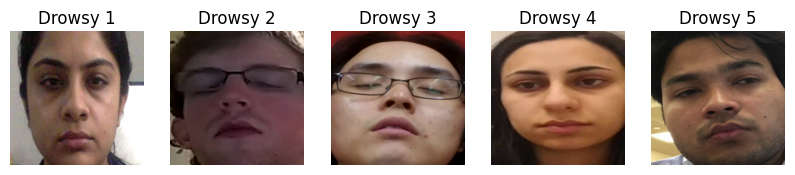

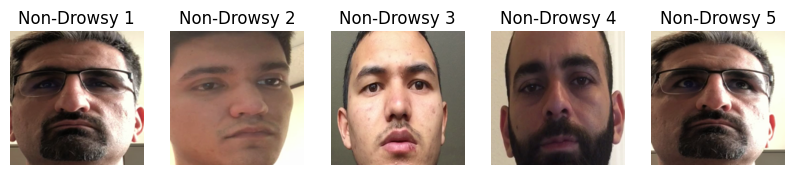

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the "Drowsy" label folder
drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy'

# List all files in the "Drowsy" folder
image_files = os.listdir(drowsy_folder_path)

# Show the first few images to inspect
num_images_to_show = 5  # You can adjust this number

plt.figure(figsize=(10, 10))

for i in range(min(num_images_to_show, len(image_files))):
    image_path = os.path.join(drowsy_folder_path, image_files[i])

    # Open the image
    image = Image.open(image_path)

    # Plot image
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title(f"Drowsy {i + 1}")

plt.show()


# Path to the "Drowsy" label folder
non_drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy'

# List all files in the "Drowsy" folder
image_files = os.listdir(non_drowsy_folder_path)

# Show the first few images to inspect
num_images_to_show = 5  # You can adjust this number

plt.figure(figsize=(10, 10))

for i in range(min(num_images_to_show, len(image_files))):
    image_path = os.path.join(non_drowsy_folder_path, image_files[i])

    # Open the image
    image = Image.open(image_path)

    # Plot image
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title(f"Non-Drowsy {i + 1}")

plt.show()

Number of Drowsy images: 22348
Number of Non-Drowsy images: 19445


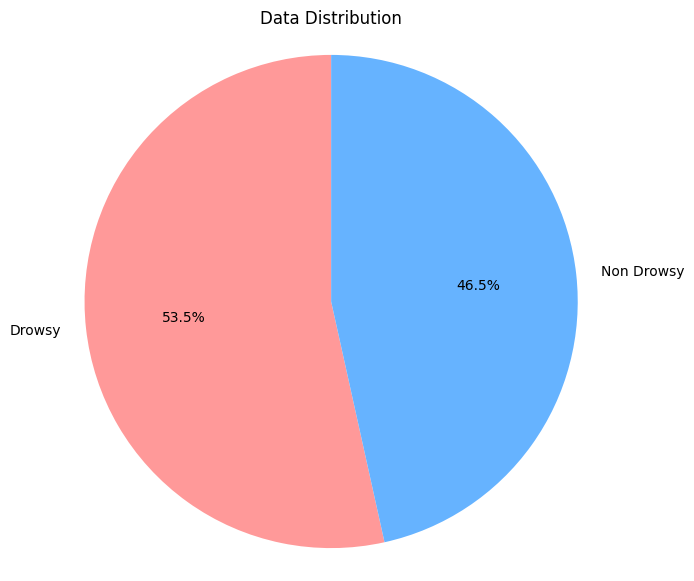

Average image dimensions for Drowsy images: (227.0, 227.0)
Average image dimensions for Non-Drowsy images: (227.0, 227.0)


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Paths to the labels
drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy'
non_drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy'

# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Count the images in both folders
drowsy_count = count_images_in_folder(drowsy_folder_path)
non_drowsy_count = count_images_in_folder(non_drowsy_folder_path)

# Print the counts
print(f"Number of Drowsy images: {drowsy_count}")
print(f"Number of Non-Drowsy images: {non_drowsy_count}")

# Pie chart showing data distribution
labels = ['Drowsy', 'Non Drowsy']
sizes = [drowsy_count, non_drowsy_count]

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Data Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Additional Analysis: Calculate average image dimensions for both categories
def get_image_dimensions(folder_path):
    image_sizes = []
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        if os.path.isfile(image_path):
            with Image.open(image_path) as img:
                image_sizes.append(img.size)
    return image_sizes

# Get dimensions of images in both folders
drowsy_sizes = get_image_dimensions(drowsy_folder_path)
non_drowsy_sizes = get_image_dimensions(non_drowsy_folder_path)

# Calculate average dimensions
def calculate_average_dimensions(image_sizes):
    widths, heights = zip(*image_sizes)
    return (sum(widths) / len(widths), sum(heights) / len(heights))

avg_drowsy_dimensions = calculate_average_dimensions(drowsy_sizes)
avg_non_drowsy_dimensions = calculate_average_dimensions(non_drowsy_sizes)

print(f"Average image dimensions for Drowsy images: {avg_drowsy_dimensions}")
print(f"Average image dimensions for Non-Drowsy images: {avg_non_drowsy_dimensions}")

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Paths to the "Drowsy" and "Non Drowsy" folders
drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Drowsy'
non_drowsy_folder_path = '/content/driver-drowsiness-dataset-ddd/Driver Drowsiness Dataset (DDD)/Non Drowsy'

# Function to load and preprocess images
def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224
            img_array = image.img_to_array(img)  # Convert image to array
            img_array = preprocess_input(img_array)  # Normalize to [0, 1]
            images.append(img_array)
            labels.append(label)
    return images, labels

# Load images and labels
drowsy_images, drowsy_labels = load_images_from_folder(drowsy_folder_path, 1)  # 1 for Drowsy
non_drowsy_images, non_drowsy_labels = load_images_from_folder(non_drowsy_folder_path, 0)  # 0 for Non-Drowsy

# Combine both datasets
images = np.array(drowsy_images + non_drowsy_images)
labels = np.array(drowsy_labels + non_drowsy_labels)

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert to float32 for training
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Check the shapes of the data
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

In [ ]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    # Convolution layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolution layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolution layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Global Average Pooling layer
    layers.GlobalAveragePooling2D(),

    # Fully connected layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model.summary()

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
